Denoising gene expression by stCluster
=====

In addition to clustering, the embeddings generated by stCluster can be applied to a variety of other downstream tasks. In this section, we will use gene expression denoising as an example to assess the expressive of the embeddings learned by stCluster.

In [1]:
import scanpy as sc
from st_datasets.dataset import get_data, get_dlpfc_data
from stCluster.eval import eval

adata, n_cluster = get_data(dataset_func=get_dlpfc_data, id='151507')
adata, g = eval(adata, radius=150, model_paras_path='/home/hanshu/stCluster_paras/DLPFC/DLPFC_0.pkl')

/home/hanshu/anaconda3/envs/stCluster/lib/python3.9/site-packages/geopandas/_compat.py:124: UserWarning: The Shapely GEOS version (3.11.1-CAPI-1.17.1) is incompatible with the GEOS version PyGEOS was compiled with (3.10.4-CAPI-1.16.2). Conversions between both will be slow.
  warnings.warn(
/home/hanshu/anaconda3/envs/stCluster/lib/python3.9/site-packages/spatialdata/__init__.py:9: UserWarning: Geopandas was set to use PyGEOS, changing to shapely 2.0 with:

	geopandas.options.use_pygeos = True

If you intended to use PyGEOS, set the option to False.
  _check_geopandas_using_shapely()
/home/hanshu/anaconda3/envs/stCluster/lib/python3.9/site-packages/anndata/_core/anndata.py:1832: UserWarning: Variable names are not unique. To make them unique, call `.var_names_make_unique`.
  utils.warn_names_duplicates("var")


>>> INFO: dataset name: dlpfc, slice id: 151507, size: (4226, 33538), cluster: 7.(0.647s)
>>> INFO: Input size torch.Size([4226, 3000]).
>>> INFO: Graph contains 28996 edges, average 6.861 edges per node.
>>> INFO: Build graph success!
>>> INFO: Finish load model, begin to generate embedding and rebuild gene expression, input data size: (4226, 3000).
>>> INFO: Finish embedding generation process, please use the embedding to do downstream evaluation, total time: 1.593s


To facilitate your assessment of the gene expression denoising effectiveness, stCluster incorporates a built-in denoising model that is used to train a denoised gene expression matrix through the embeddings.

>>> INFO: Input size torch.Size([4226, 30]).


>>> INFO: Training: 100%|██████████| 600/600 [00:02<00:00, 203.78it/s]


>>> INFO: Finish gene denoising process, total time: 3.017s.


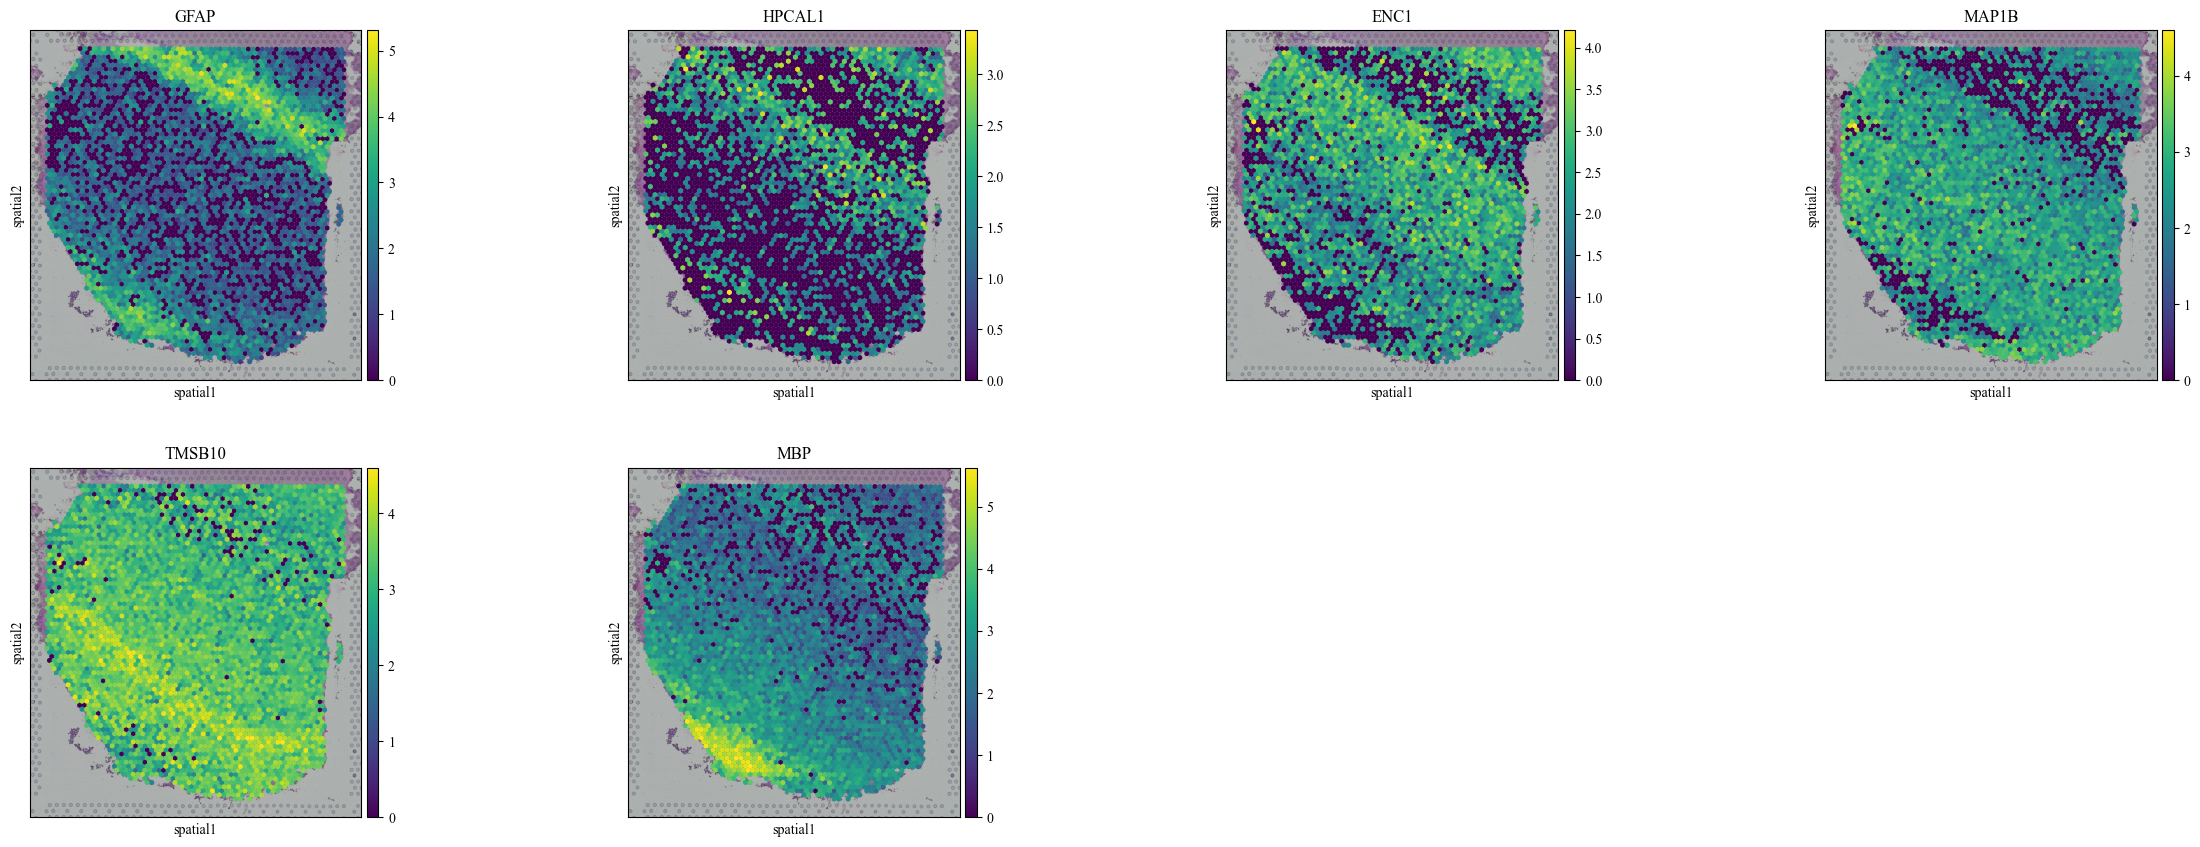

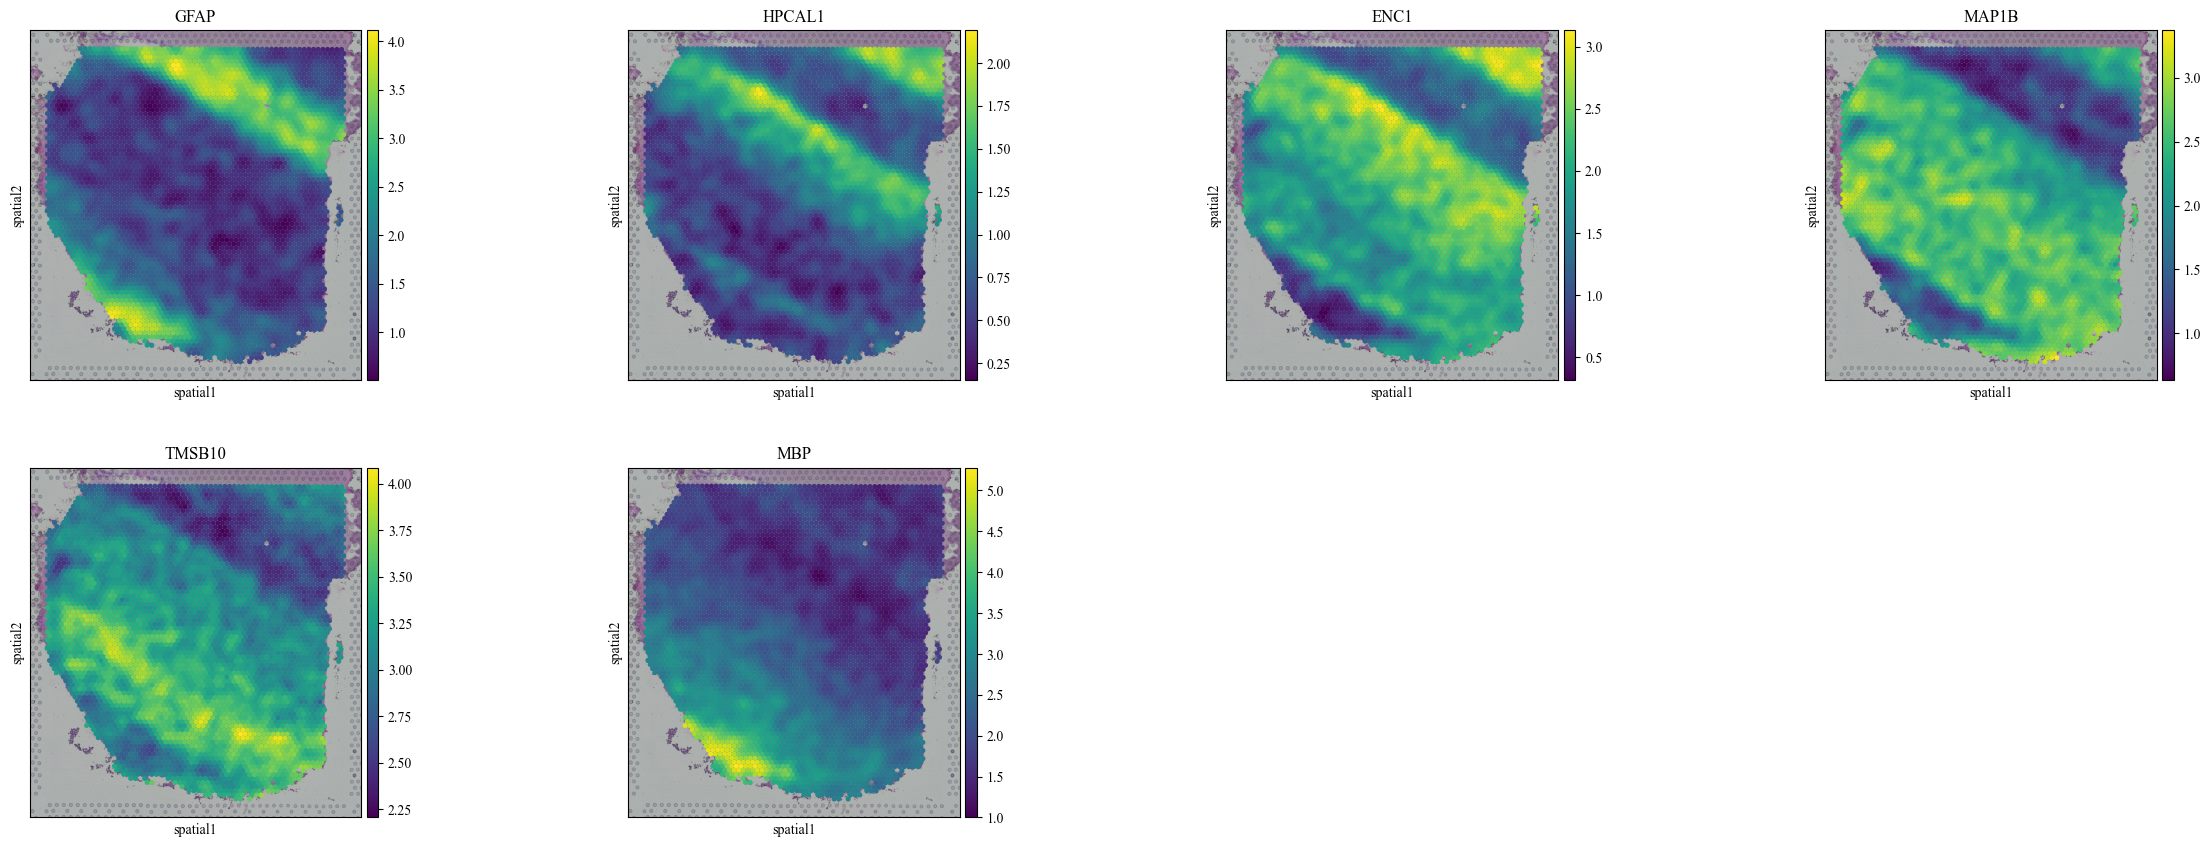

In [2]:
import scanpy as sc
from stCluster.denoising import train

adata = train(data=adata, spatial_graph=g)  # train denoised gene expression matrix

# draw plots
sc.pl.spatial(adata, color=['GFAP', 'HPCAL1', 'ENC1', 'MAP1B', 'TMSB10', 'MBP'], spot_size=150)
sc.pl.spatial(adata, color=['GFAP', 'HPCAL1', 'ENC1', 'MAP1B', 'TMSB10', 'MBP'], layer='denoised_gene', spot_size=150)